In [16]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import copy

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


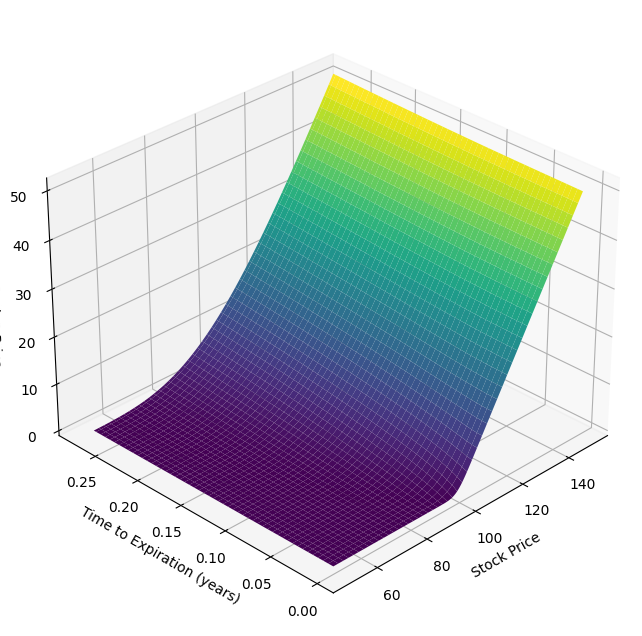

In [141]:
# Parameters
K = 100
r = 0.03
sigma = 0.5

# Mesh
days_to_expire = 100
T = np.linspace(1/365, days_to_expire/365, days_to_expire)  # convert days to years
S = np.arange(50, 150, 0.1)

# Calculate call prices
S, T = np.meshgrid(S, T)
call_prices_base = black_scholes_call_price(S, K, T, r, sigma)


# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, T, call_prices_base, cmap='viridis')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Call Option Price')

# Change the rotation
elevation_angle = 30  # in degrees
azimuth_angle = -135  # in degrees
ax.view_init(elevation_angle, azimuth_angle)
plt.savefig('/Users/mark/Desktop/plot.png')

plt.show()

## Numeric solution

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (1000,).

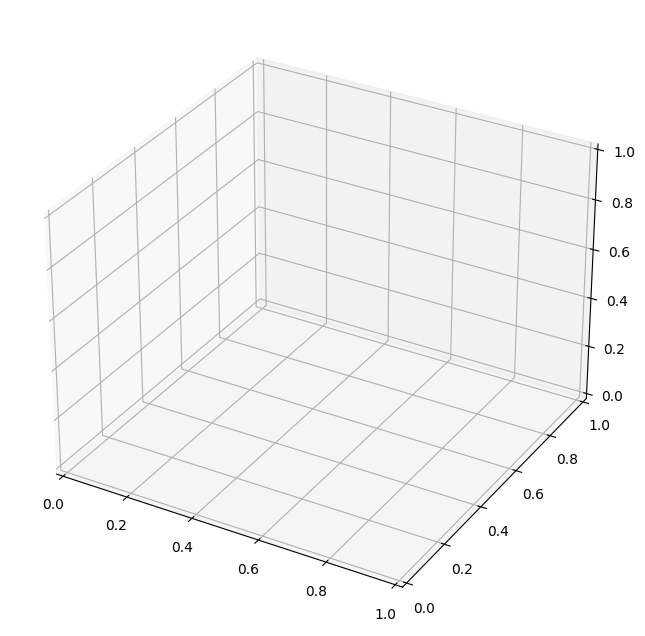

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import solve

# Parameters
K = 100
r = 0.03
sigma = 1
T = 100 / 365  # convert days to years
S_max = 150
S_min = 50

# Discretization
N_S = 1000  # number of asset price points
N_T = 100  # number of time points
S = np.linspace(S_min, S_max, N_S)
T = np.linspace(0, T, N_T)
dS = S[1] - S[0]
dT = T[1] - T[0]

# Initialize option values
call_prices = np.zeros((N_S, N_T))

# Boundary condition at expiry
call_prices[:, -1] = np.maximum(S - K, 0)

# Boundary conditions for S
call_prices[0, :] = 0
call_prices[-1, :] = S_max - K * np.exp(-r * (N_T - np.arange(N_T)) * dT)

# Finite difference scheme
for j in range(N_T - 2, -1, -1):
    A = -0.5 * dT * (sigma**2 * S[1:-1]**2 / dS**2 - r * S[1:-1] / dS)
    B = 1 + dT * (sigma**2 * S[1:-1]**2 / dS**2 + r)
    C = -0.5 * dT * (sigma**2 * S[1:-1]**2 / dS**2 + r * S[1:-1] / dS)
    M = np.diag(A[1:], -1) + np.diag(B) + np.diag(C[:-1], 1)
    call_prices[1:-1, j] = solve(M, call_prices[1:-1, j+1])
    
# Plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, call_prices, cmap='viridis')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Call Option Price')

# Change the rotation
elevation_angle = 30  # in degrees
azimuth_angle = -135  # in degrees
ax.view_init(elevation_angle, azimuth_angle)

plt.show()

In [90]:
for line in ((call_prices_numeric - call_prices_base) < 10):
    for elem in line:
        if elem == False:
            print("FFF")
            print(elem)

In [119]:
(call_prices_numeric - call_prices_base).max()

0.9185643592739154

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000,) and arg 1 with shape (100,).

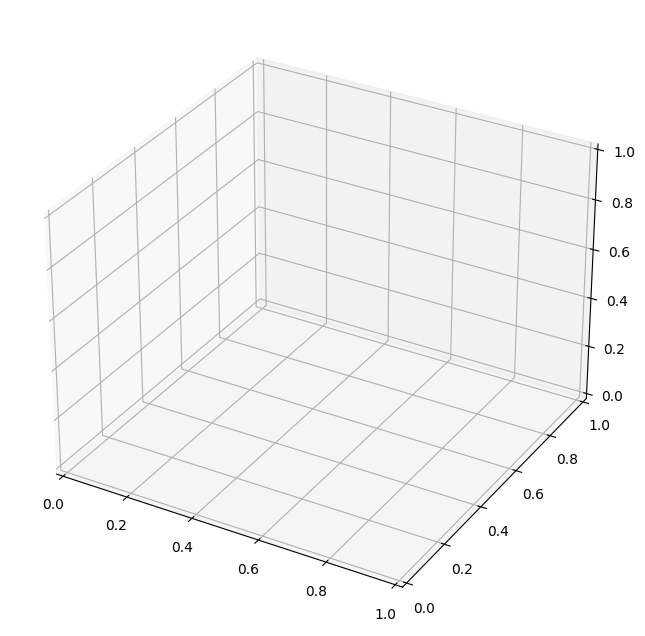

In [118]:
# Plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, T, call_prices_numeric, cmap='viridis')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Call Option Price')

# Change the rotation
elevation_angle = 30  # in degrees
azimuth_angle = -135  # in degrees
ax.view_init(elevation_angle, azimuth_angle)

plt.show()